In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("dark_background")

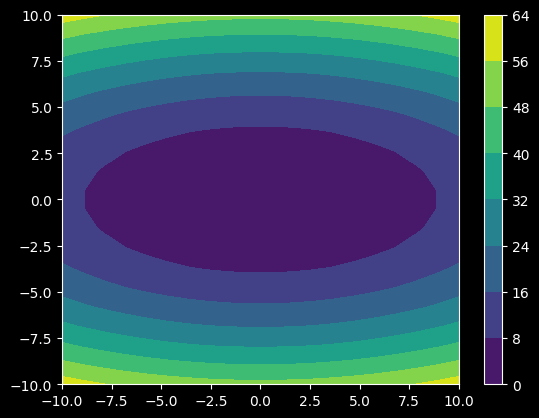

In [79]:
sx = 0.1
sy = 0.5
f = lambda x, y: sx*x**2 + sy*y**2
dfdx = lambda x, y: 2*sx*x
dfdy = lambda x, y: 2*sy*y
df = lambda x,y: (dfdx(x,y), dfdy(x,y))

N = 20
X, Y = np.meshgrid(np.linspace(-10, 10, N), np.linspace(-10, 10, N))
Z = f(X, Y)
plt.contourf(X, Y, Z)
plt.colorbar()

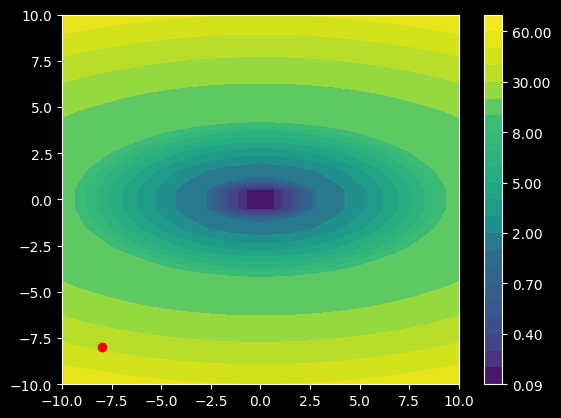

In [80]:
w_x = -8
w_y = -8
plt.contourf(X, Y, Z, locator=plt.LogLocator(base=10, subs='auto'))
plt.colorbar()
plt.scatter([w_x], [w_y], c="red")

## SGD

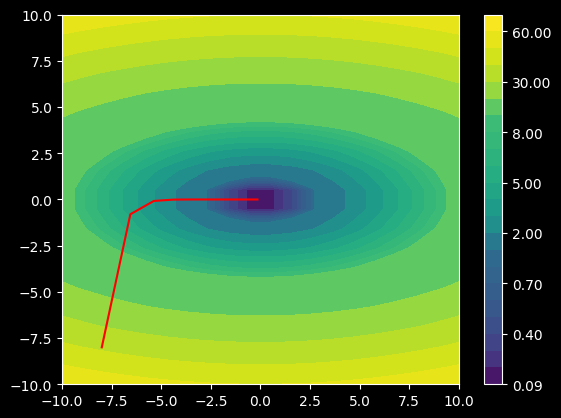

In [96]:
def sgd(w,dw,lr):
	w -= lr*dw
	return w

lr = .9
w_x = -8
w_y = -8
plt.contourf(X, Y, Z, locator=plt.LogLocator(base=10.0, subs='auto'))
plt.colorbar()

w_x_history = [w_x]
w_y_history = [w_y]
for i in range(20):
	dw_x, dw_y = df(w_x, w_y)
	w_x = sgd(w_x, dw_x, lr)
	w_y = sgd(w_y, dw_y, lr)
	w_x_history.append(w_x)
	w_y_history.append(w_y)
	

plt.plot(w_x_history, w_y_history, c="red")

## SGD w/ Momentum

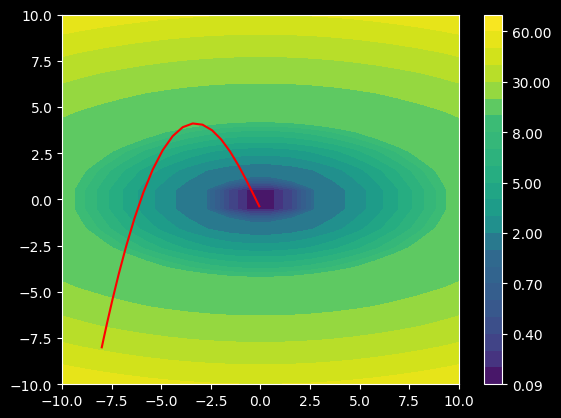

In [93]:
class SGDMomentum:
	def __init__(self, beta=0.9):
		self.beta = beta
		self.v = 0

	def __call__(self, w, dw, lr):
		self.v = self.v*self.beta + (1-self.beta)*dw
		w -= lr*self.v
		return w


lr = 0.6
beta = 0.9

w_x = -8
w_y = -8
w_x_update = SGDMomentum(beta)
w_y_update = SGDMomentum(beta)

plt.contourf(X, Y, Z, locator=plt.LogLocator(base=10.0, subs='auto'))
plt.colorbar()

w_x_history = [w_x]
w_y_history = [w_y]
for i in range(20):
	dw_x, dw_y = df(w_x, w_y)
	w_x = w_x_update(w_x, dw_x, lr)
	w_y = w_y_update(w_y, dw_y, lr)
	w_x_history.append(w_x)
	w_y_history.append(w_y)
	

plt.plot(w_x_history, w_y_history, c="red")

## RMSProp

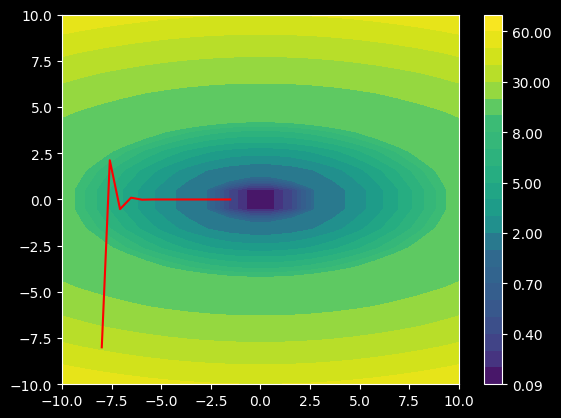

In [112]:
class RMSProp:
	def __init__(self, beta=0.9, eps=1e-8):
		self.beta = beta
		self.v = 0
		self.eps = eps

	def __call__(self, w, dw, lr):
		self.v = self.v*self.beta + (1-self.beta)*(dw**2)
		w -= lr*dw/((self.v)**-.5 + self.eps)
		return w


lr = 0.5
beta = 0.9

w_x = -8
w_y = -8
w_x_update = RMSProp(beta)
w_y_update = RMSProp(beta)

plt.contourf(X, Y, Z, locator=plt.LogLocator(base=10.0, subs='auto'))
plt.colorbar()

w_x_history = [w_x]
w_y_history = [w_y]
for i in range(20):
	dw_x, dw_y = df(w_x, w_y)
	w_x = w_x_update(w_x, dw_x, lr)
	w_y = w_y_update(w_y, dw_y, lr)
	w_x_history.append(w_x)
	w_y_history.append(w_y)
	

plt.plot(w_x_history, w_y_history, c="red")

## Adam

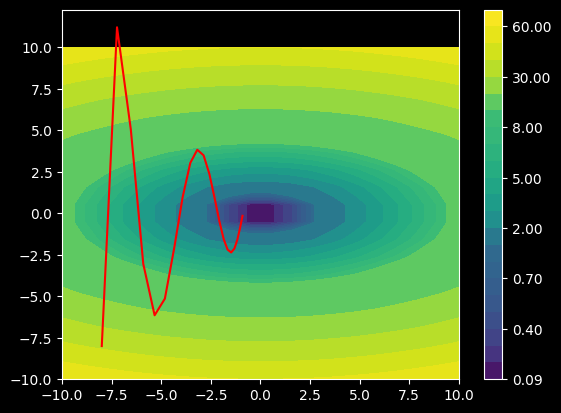

In [127]:
class Adam:
	def __init__(self, beta1=0.9, beta2=0.999, eps=1e-8):
		self.beta1 = beta1
		self.beta2 = beta2
		self.eps = eps
		self.v = 0
		self.s = 0

	def __call__(self, w, dw, lr, t):
		self.v = self.v*self.beta1 + (1-self.beta1)*dw # momentum
		self.s = self.s*self.beta2 + (1-self.beta2)*(dw**2) # rmsprop

		# bias corrected
		v_corrected = self.v / (1-self.beta1**t)
		s_corrected = self.s / (1-self.beta2**t)

		w -= lr* (v_corrected / (s_corrected**-.5 + self.eps)) # update rmsprop and momentum (as adam!)
		
		return w


lr = 0.3

w_x = -8
w_y = -8
w_x_update = Adam()
w_y_update = Adam()

plt.contourf(X, Y, Z, locator=plt.LogLocator(base=10.0, subs='auto'))
plt.colorbar()

w_x_history = [w_x]
w_y_history = [w_y]
for i in range(20):
	dw_x, dw_y = df(w_x, w_y)
	t = i+1
	w_x = w_x_update(w_x, dw_x, lr, t)
	w_y = w_y_update(w_y, dw_y, lr, t)
	w_x_history.append(w_x)
	w_y_history.append(w_y)
	

plt.plot(w_x_history, w_y_history, c="red")